# Introduction to Machine Learning with Iris data set

## Introduction

We will be using the iris data set. This is a well-known data set containing iris species and sepal and petal measurements

In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

## Load the data and examine it

from the file using the techniques learned today. Examine it.

In [2]:
data = pd.read_csv('c:/Users/jguim/MachineLearningResources/Iris_Data.csv')
data.head(10) #First 10

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
print(data.shape)  # 150 rows, 5 columns

(150, 5)


In [4]:
print(data.columns.tolist()) #List of column names

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']


In [5]:
print(data.dtypes.tolist()) # Data types of all column names

[dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('O')]


## Remove the "Iris-" from species column

In feature engineering we want to simplify as much data as possible

In [6]:
data['plant_species'] = (data.species.apply(lambda x: x.replace('Iris-', '')))
del data['species']
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,plant_species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


## Determine the number of each species & Improve the Describe table

This will give us the accurate amount for each species

The Describe Table is missing 2 features. The median and the range. We will add them to our own table and organize it.

In [7]:
newData = data.columns.values
table = data.describe() #Does not give us the range, and the 50% is the median, so we will do fixes manually
extra = pd.concat([table.iloc[5:6], table.iloc[5:6]]) #Selecting the 50% twice, the second one will be adjusted
extra = extra.set_index([pd.Index(['median', 'range'])]) #Changing the index name to the desired one in anothe df
for i in range(4):
    extra[newData[i]][1] = table[newData[i]][7] - table[newData[i]][3] # Yields the range

newDescribe = pd.concat([table, extra]) # Connecting both tables and ordering the rows
newDescribe = newDescribe.reindex(['count', 'min', 'max', '25%','50%', '75%', 'std', 'mean','median', 'range'])

print('Number of species:\n')
print(data['plant_species'].value_counts())
print('\nEnhanced describe table:\n')
print(newDescribe)

Number of species:

virginica     50
versicolor    50
setosa        50
Name: plant_species, dtype: int64

Enhanced describe table:

        sepal_length  sepal_width  petal_length  petal_width
count     150.000000   150.000000    150.000000   150.000000
min         4.300000     2.000000      1.000000     0.100000
max         7.900000     4.400000      6.900000     2.500000
25%         5.100000     2.800000      1.600000     0.300000
50%         5.800000     3.000000      4.350000     1.300000
75%         6.400000     3.300000      5.100000     1.800000
std         0.828066     0.433594      1.764420     0.763161
mean        5.843333     3.054000      3.758667     1.198667
median      5.800000     3.000000      4.350000     1.300000
range       3.600000     2.400000      5.900000     2.400000


## Calculating the mean and median of each measurement 
(sepal_length, sepal_width, petal_length, and petal_width)

In [8]:
data.groupby('plant_species').agg(['mean', 'median'])

sepal_length        sepal_width        petal_length         \
                      mean median        mean median         mean median   
plant_species                                                              
setosa               5.006    5.0       3.418    3.4        1.464   1.50   
versicolor           5.936    5.9       2.770    2.8        4.260   4.35   
virginica            6.588    6.5       2.974    3.0        5.552   5.55   

              petal_width         
                     mean median  
plant_species                     
setosa              0.244    0.2  
versicolor          1.326    1.3  
virginica           2.026    2.0

## Scatter plot 
`sepal_length` vs `sepal_width` using Matplotlib

[Text(0, 0.5, 'width'),
 Text(0.5, 0, 'length'),
 Text(0.5, 1.0, 'sepal_length vs sepal_width')]

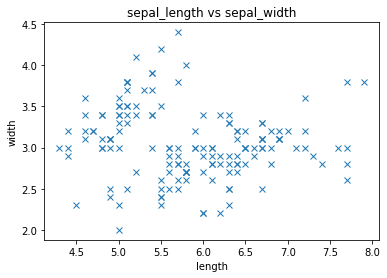

In [9]:
fig, ax = plt.subplots()
ax.plot(data.sepal_length, data.sepal_width, ls ='', marker='x')
ax.set(xlabel = 'length', ylabel = 'width', title = 'sepal_length vs sepal_width')

## Histogram 
sepal_length vs sepal_width using Matplotlib

[Text(0, 0.5, 'width'),
 Text(0.5, 0, 'length'),
 Text(0.5, 1.0, 'sepal_length vs sepal_width')]

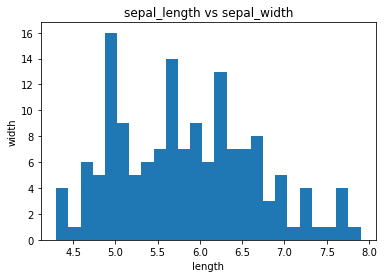

In [10]:
fig, ax = plt.subplots()
ax.hist(data.sepal_length, bins=25)
ax.set(xlabel = 'length', ylabel = 'width', title = 'sepal_length vs sepal_width')

## Overlayed Histogram for each feature

Also separated for each feature

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000184A541C550>,
      dtype=object)

<Figure size 432x288 with 0 Axes>

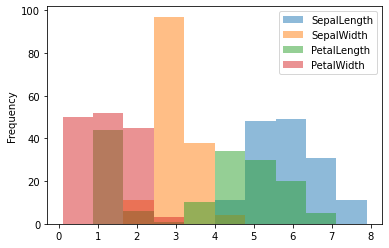

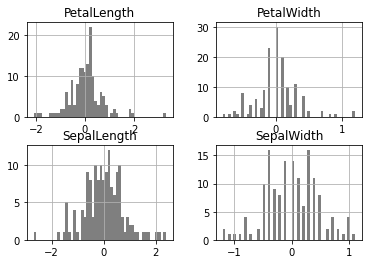

In [11]:
hist = pd.DataFrame({'SepalLength': data.sepal_length, 'SepalWidth': data.sepal_width, 
                     'PetalLength': data.petal_length, 'PetalWidth': data.petal_width}, 
                    columns=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'])
plt.figure();
hist.plot.hist(alpha=0.5)
hist.diff().hist(color='k', alpha=0.5, bins=50) #Separated for each feature

## Boxplot of each petal and sepal measurement using pandas

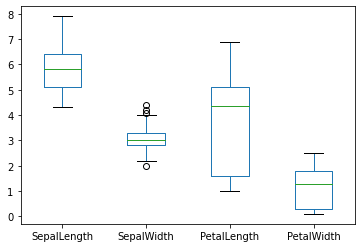

In [12]:
boxP = pd.DataFrame({'SepalLength': data.sepal_length, 'SepalWidth': data.sepal_width, 
                   'PetalLength': data.petal_length, 'PetalWidth': data.petal_width}, 
                    columns=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'])
boxP.plot.box()

## Boxplot of each petal and sepal measurement using seaborn

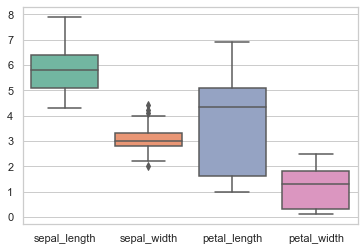

In [13]:
sns.set(style="whitegrid")
iris = sns.load_dataset("iris")
ax = sns.boxplot(data=iris, orient="v", palette="Set2")

## Boxplot of petal length measurement for every species using seaborn

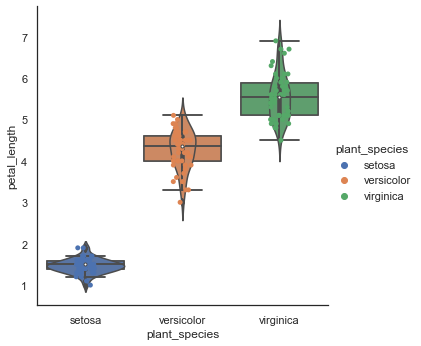

In [14]:
sns.set(style="white", color_codes=True)

sns.FacetGrid(data, hue="plant_species", height=5) \
   .map(plt.scatter, "sepal_length", "sepal_width") \
   .add_legend()

sns.boxplot(x="plant_species", y="petal_length", data=data)

ax = sns.boxplot(x="plant_species", y="petal_length", data=data)
ax = sns.stripplot(x="plant_species", y="petal_length", data=data, jitter=True, edgecolor="gray")

sns.violinplot(x="plant_species", y="petal_length", data=data, size=6)

## Pairplot for every species

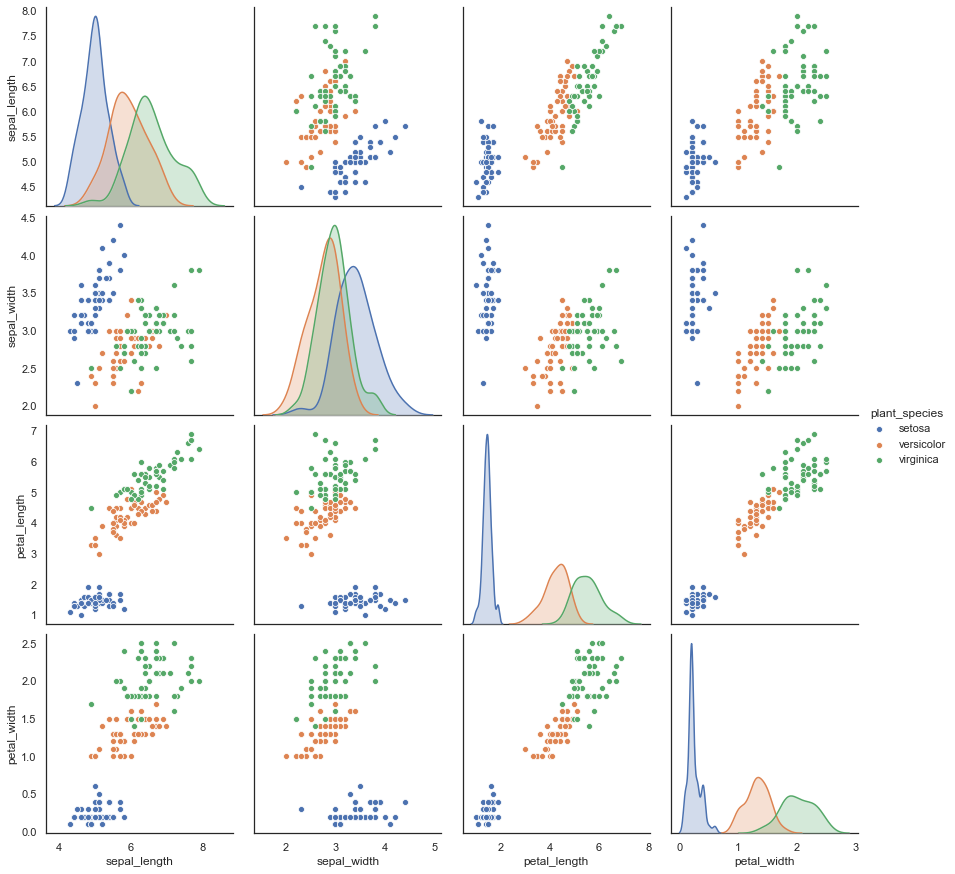

In [15]:
sns.pairplot(data, hue = 'plant_species', height = 3)